## Advanced regression - House Price Prediction 
### This notebook explores advanced regression techniques for house price prediction.
The following steps are covered:

1. Data understanding and exploration
2. Data cleaning and preparation
3. Model building and evaluation


In [282]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Suppressing warnings 
import warnings
warnings.filterwarnings('ignore')

## 1. Data understanding and exploration

In [283]:
# Load the dataset, specifying encoding to handle potential character issues
Housing_data = pd.read_csv("train.csv")

# Display ing the first 5 rows to get a glimpse of the data
Housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [284]:
Housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [285]:
# Exploring the data dimensions
Housing_data.shape

(1460, 81)

So the dataset have 1460 rows and 81 columns. Now we have to find out more concise summary of the Dataset structure and information.

In [286]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Observation:
This dataset contains information on 1460 houses, described by 81 features like size, type, condition, and location. Most features are categorical, but some like frontage area are numerical. Notably, some features like alley access have missing values for many houses. This information will be helpful for further analysis and cleaning as we prepare this data for house price prediction.

## 2. Data cleaning and preparation

In [287]:
# Identify columns with missing values
missing_cols = Housing_data.columns[Housing_data.isnull().any()]

# Calculate missing value proportions
null_proportions = (Housing_data.isnull().sum() / len(Housing_data)) * 100
null_proportions = null_proportions[null_proportions > 0].sort_values(ascending=False)

# Print summary of missing values
print("\nMissing Value Summary:\n", null_proportions)


Missing Value Summary:
 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


In dealing with missing values, for numerical data, in cases where 'NaN' signifies the absence of an attribute, replacing it with "None" maintains the significance of the information, preserving its impact on house prices without dropping the values.

In [288]:
# Distinct Handling for "Meaningful" Missing Values
# -------------------------------------------------------------------

# Define columns where NaN represents a meaningful absence of a feature
meaningful_values = [
   "Alley",
   "BsmtQual",
   "BsmtCond",
   "BsmtExposure",
   "BsmtFinType1",
   "BsmtFinType2",
   "FireplaceQu",
   "GarageType",
   "GarageFinish",
   "GarageQual",
   "GarageCond",
    "PoolQC",
   "Fence",
   "MiscFeature",
]

# Fill these columns with "None" to explicitly indicate absence
for col in meaningful_values:
   Housing_data[col].fillna("None", inplace=True)  # Fill in-place for efficiency

# Identify any remaining columns with missing values
remaining_null_cols = Housing_data.columns[Housing_data.isnull().any()]

# If there are remaining nulls:
if len(remaining_null_cols) > 0:
    print("The following columns still contain missing values:")
    print(remaining_null_cols)
    # ... (Implement additional imputation or removal strategies as needed)
else:
    print("All missing values have been successfully addressed.")


The following columns still contain missing values:
Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'], dtype='object')


In [289]:
# -------------------------------------------------------------------
# Addressing Remaining Missing Values
# -------------------------------------------------------------------

# Impute LotFrontage based on Neighborhood medians
Housing_data["LotFrontage"] = Housing_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

# Impute GarageYrBlt with median
Housing_data["GarageYrBlt"].fillna(Housing_data["GarageYrBlt"].median(), inplace=True)

# Impute MasVnrArea with median
Housing_data["MasVnrArea"].fillna(Housing_data["MasVnrArea"].median(), inplace=True)

# Drop rows with missing values in Electrical (assuming very few)
Housing_data.dropna(subset=["Electrical"], inplace=True)


# Verification of Missing Value Handling


# Check for any remaining missing values
if Housing_data.isnull().sum().sum() > 0:
    print("There are still some missing values in the dataset.")
else:
    print("All missing values have been successfully addressed.")


# Explore the descriptive statistics of the handled columns
print("\nLotFrontage (after imputation):\n", Housing_data["LotFrontage"].describe())
print("\nGarageYrBlt (after imputation):\n", Housing_data["GarageYrBlt"].describe())
print("\nMasVnrArea (after imputation):\n", Housing_data["MasVnrArea"].describe())
print("\nElectrical (after dropping missing rows):\n", Housing_data["Electrical"].describe())


There are still some missing values in the dataset.

LotFrontage (after imputation):
 count    1459.000000
mean       70.197738
std        22.439474
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

GarageYrBlt (after imputation):
 count    1459.000000
mean     1978.569568
std        23.993708
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

MasVnrArea (after imputation):
 count    1459.000000
mean      103.187800
std       180.773158
min         0.000000
25%         0.000000
50%         0.000000
75%       164.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

Electrical (after dropping missing rows):
 count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


There is still missing value so. Again checking how much missing value present

In [290]:
#missing data
total = Housing_data.isnull().sum().sort_values(ascending=False)
percent = (Housing_data.isnull().sum()/Housing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
MasVnrType,8,0.005483
Id,0,0.000000
GarageFinish,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000


MasVnrType have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", 

In [291]:
Housing_data["MasVnrType"].fillna("None", inplace=True)
#Again Checking missing data
total = Housing_data.isnull().sum().sort_values(ascending=False)
percent = (Housing_data.isnull().sum()/Housing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Id,0,0.0
CentralAir,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0


Hence All missing value handeled

In [292]:
Housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Now we will check for other data types:

In [293]:
# Identify numerical and categorical features
numerical_features = list(Housing_data.select_dtypes(include=["int64", "float64"]).columns)
categorical_features = list(Housing_data.select_dtypes(include=["object"]).columns)

# Print lists of numerical and categorical features
print("\nThe Numerical Features are:\n", numerical_features)
print("\nCategorical Features are:\n", categorical_features)


The Numerical Features are:
 ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Categorical Features are:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Funct

In [294]:
# Creating a DataFrame summarizing feature types
feature_types_df = pd.DataFrame(Housing_data.dtypes).reset_index()
feature_types_df.columns = ["Feature", "Type"]
feature_types_df = feature_types_df.groupby("Type").agg(count=("Feature", "count")).reset_index()

# Print the count of each feature type
print("\nCount of Feature Types:\n", feature_types_df)


Count of Feature Types:
       Type  count
0    int64     35
1  float64      3
2   object     43


### Feature Engineering: Transforming Categorical Values
Having successfully addressed the missing values, the subsequent phase of our data preprocessing involves feature engineering, a crucial step in preparing the data for modeling. To facilitate the utilization of this data in our model, we need to create feature vectors. This pivotal process entails the conversion of categorical values into numerical representations. By transforming categorical variables into numerical counterparts, we enable the model to interpret and utilize this information effectively during the training phase. This transformation ensures that the data is appropriately formatted and ready to be fed into our model for further analysis and prediction.

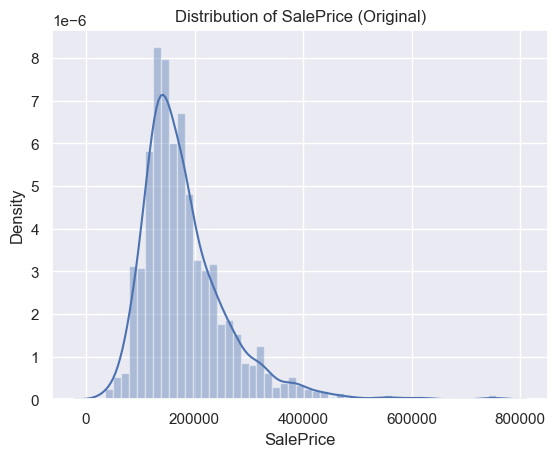

In [295]:
# Visualize the distribution of the target variable
sns.distplot(Housing_data["SalePrice"])
plt.title("Distribution of SalePrice (Original)")
plt.show()


The 'SalePrice' target variable displays significant skewness in its distribution. To enhance model performance, a logarithmic transformation is proposed. Transforming skewed distributions into a more normal form is known to benefit machine learning models, improving their predictive capability. By logarithmically adjusting the prices, we aim to achieve a more balanced distribution, potentially leading to better model performance during training and predictions.

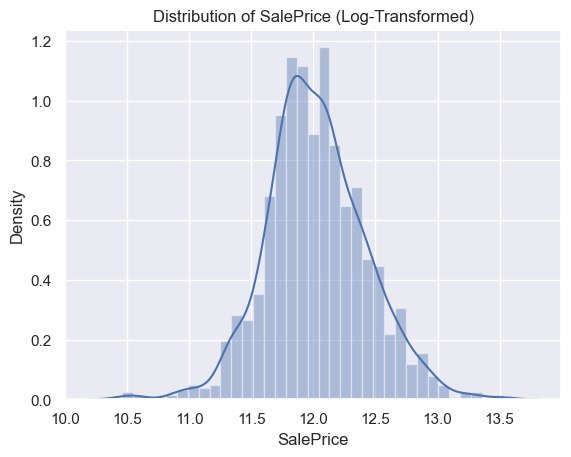

In [296]:
# Apply log transformation to SalePrice to reduce skewness
Housing_data["SalePrice"] = np.log1p(Housing_data["SalePrice"])  
sns.distplot(Housing_data["SalePrice"])
plt.title("Distribution of SalePrice (Log-Transformed)")
plt.show()

#### Target variable 'sale Price' vs a few select columns

In [297]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Prepare data for Plotly
x = Housing_data["Neighborhood"]
y = Housing_data["SalePrice"]

# Create the interactive bar plot
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Bar(x=x, y=y, marker_line_color="orange", marker_line_width=1, hoverinfo="x+y")
)

# Add interactivity options
fig.update_layout(
    title_text="Sales Price with Respect to Neighborhood",
    yaxis_title="Sale Price",
    xaxis_type="category",
    hovermode="closest",
)

# Display the interactive plot
fig.show()


In [298]:
# plot 'overall quality' with respect to 'Saleprice'
x = Housing_data["OverallQual"]
y = Housing_data["SalePrice"]

# Create the interactive bar plot with Plotly
fig = make_subplots(rows=1, cols=1)

# Add the bar trace with interactive hover modes
fig.add_trace(
    go.Bar(
        x=x,
        y=y,
        marker_line_color="green",
        marker_line_width=1,
        hoverinfo="x+y",
        hovertemplate="Overall Quality: %{x}<br>Sale Price: $%{y:.2f}"
    )
)

# Customize layout for clarity and interactivity
fig.update_layout(
    title_text="Sales Price with Respect to Overall Quality",
    yaxis_title="Sale Price",
    xaxis_title="Overall Quality",
    xaxis_tickvals=x.unique(),  # Ensure proper x-axis labeling
    hovermode="x unified",  # Link hover across multiple traces
    autosize=True,
)

# Display the interactive plot
fig.show()

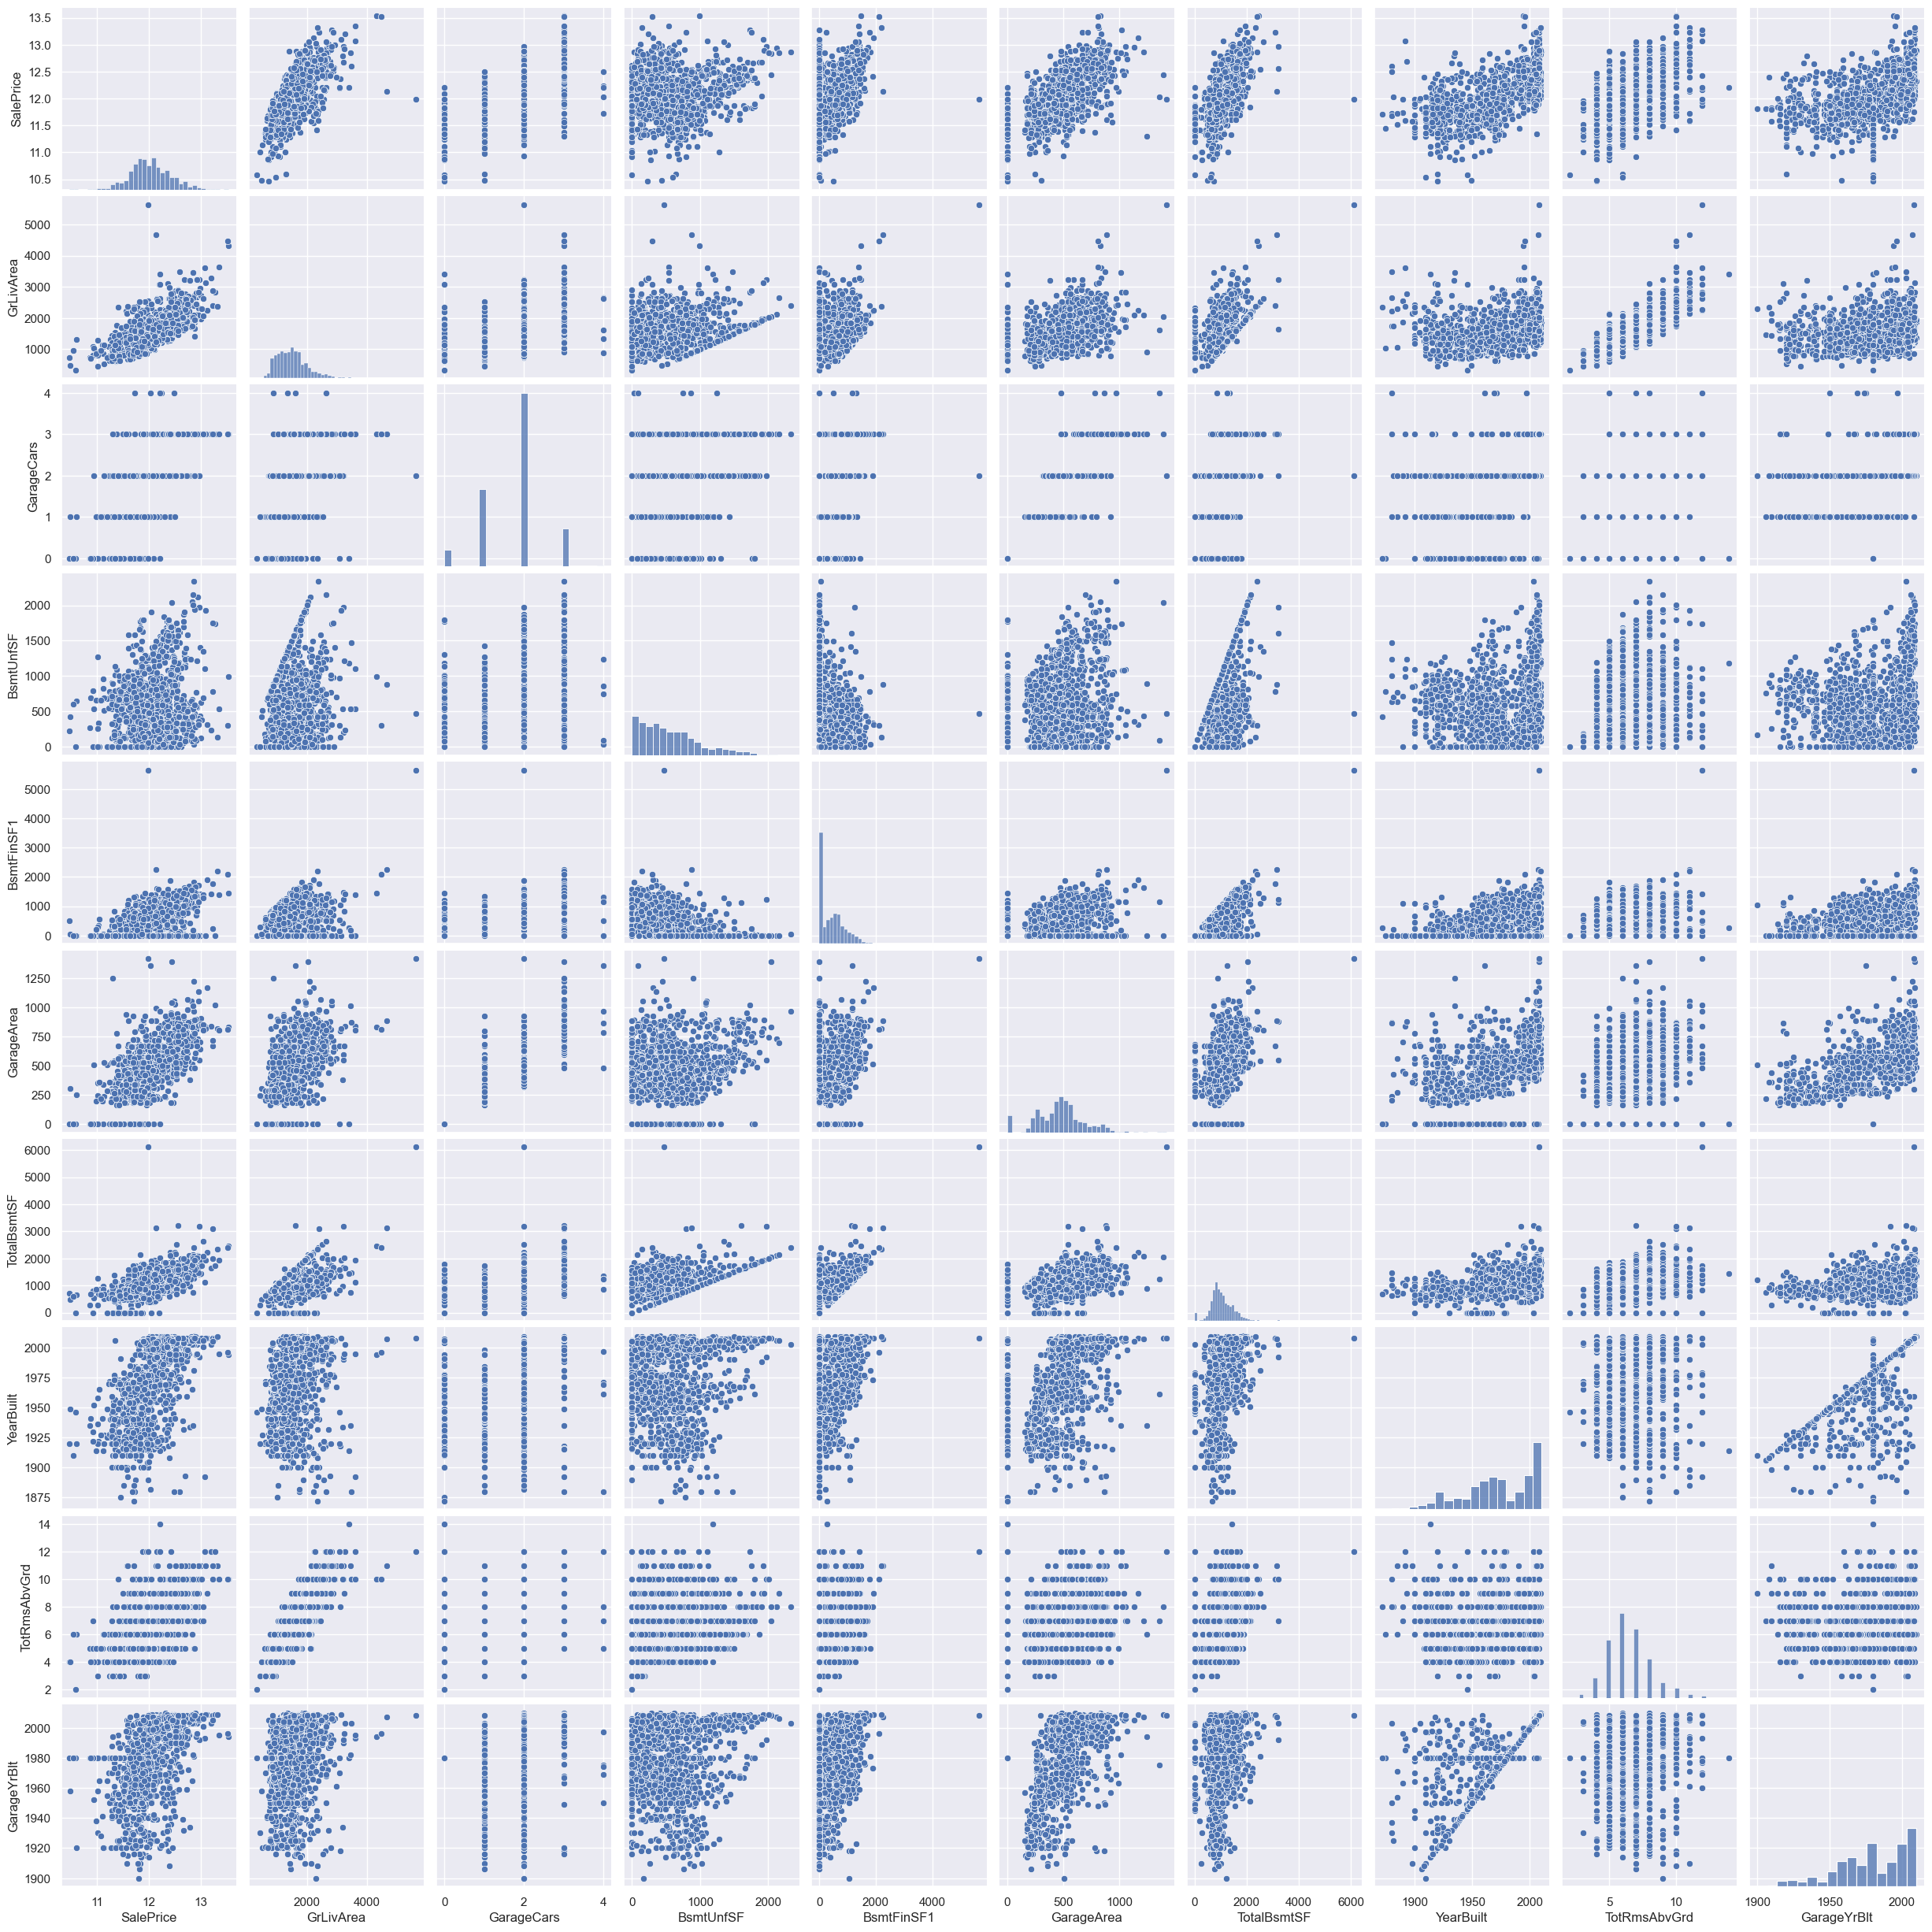

In [299]:
# pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(Housing_data[cols])
plt.show()

In [300]:
types_train = Housing_data.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object
numerical_values_train = list(num_train.index)
categorical_values_train = list(cat_train.index)
for i in categorical_values_train:
    feature_set = set(Housing_data[i])
    for j in feature_set:
        feature_list = list(feature_set)
        Housing_data.loc[Housing_data[i] == j, i] = feature_list.index(j)

Now we have to encode categrical variables to build our model

## 3. Model Building and Evaluation

In [301]:
# Drop unnecessary columns (clarify if intentional)

Housing_data["TransformedPrice"] = np.log(Housing_data["SalePrice"])
X = Housing_data.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
y = Housing_data["TransformedPrice"]


In [302]:

# -------------------------------------------------------------------
# Train-Test Split
# -------------------------------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100)

# -------------------------------------------------------------------
# Hyperparameter Tuning Setup
# -------------------------------------------------------------------

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model 


params = {"alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                      0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                      100, 500, 1000]}  # Define hyperparameter grid

# -------------------------------------------------------------------
# Cross-Validation Setup
# -------------------------------------------------------------------
# Applying Lasso
lasso = Lasso()
lasso = Lasso()  # Instantiate Lasso model

params = {"alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                      0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                      100, 500, 1000]}  # Define hyperparameter grid

# -------------------------------------------------------------------
# Cross-Validation Setup
# -------------------------------------------------------------------

folds = 5  # Specify number of cross-validation folds

# Instantiate GridSearchCV object with clear parameters
model_cv = GridSearchCV(
    estimator=lasso,
    param_grid=params,
    scoring="neg_mean_absolute_error",
    cv=folds,
    return_train_score=True,
    verbose=1
)

# -------------------------------------------------------------------
# Model Fitting and Tuning
# -------------------------------------------------------------------

# Fit the model with cross-validation to find optimal hyperparameters
model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()


Fitting 5 folds for each of 28 candidates, totalling 140 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018672,0.006289,0.007333,0.007055,0.0001,{'alpha': 0.0001},-0.006790,-0.008446,-0.008361,-0.008119,...,-0.007846,0.000620,1,-0.007402,-0.006894,-0.006447,-0.007029,-0.007019,-0.006958,0.000307
1,0.015533,0.004680,0.008158,0.004086,0.001,{'alpha': 0.001},-0.007919,-0.008711,-0.008706,-0.008101,...,-0.008239,0.000399,2,-0.007903,-0.007813,-0.007495,-0.007283,-0.007824,-0.007664,0.000236
2,0.027976,0.004383,0.005539,0.004593,0.01,{'alpha': 0.01},-0.008685,-0.010328,-0.010602,-0.010379,...,-0.009811,0.000780,3,-0.009753,-0.009374,-0.009029,-0.008968,-0.009600,-0.009345,0.000308
3,0.020294,0.005622,0.002805,0.001601,0.05,{'alpha': 0.05},-0.008894,-0.010106,-0.010899,-0.010318,...,-0.009908,0.000715,4,-0.009922,-0.009602,-0.009220,-0.009202,-0.009797,-0.009548,0.000294
4,0.016463,0.009986,0.010839,0.007073,0.1,{'alpha': 0.1},-0.009519,-0.010663,-0.011705,-0.011320,...,-0.010654,0.000798,5,-0.010698,-0.010465,-0.009977,-0.010027,-0.010517,-0.010337,0.000284


plotting mean test and train scoes with alpha 

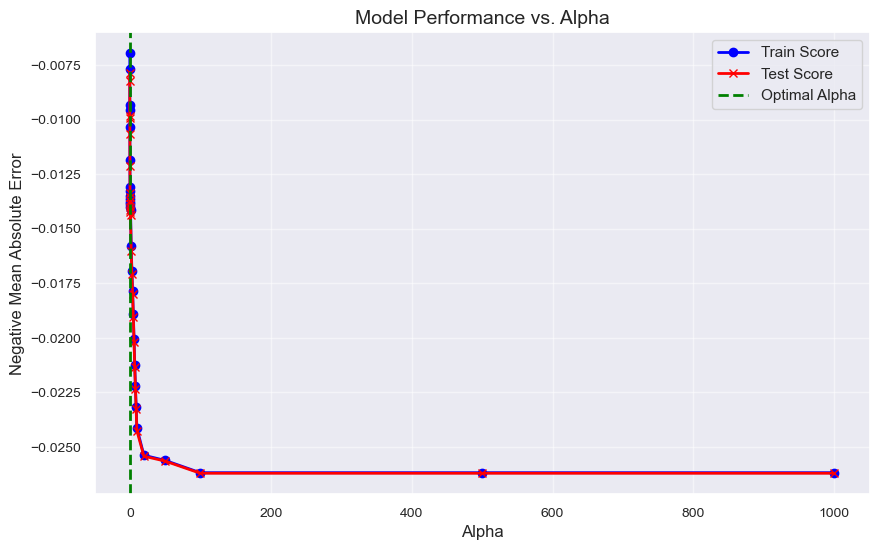

In [303]:
# Ensure alpha values are numerical
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')


plt.figure(figsize=(10, 6)) 


plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train Score',
         color='blue', marker='o', linewidth=2)
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test Score',
         color='red', marker='x', linewidth=2)

# Add informative labels, title, and legend
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Negative Mean Absolute Error', fontsize=12)
plt.title("Model Performance vs. Alpha", fontsize=14)
plt.legend(loc='best', fontsize=12)

# Customize grid and axes appearance
plt.grid(True, alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Highlight optimal alpha (adjust based on your results)
optimal_alpha = 0.1  # Replace with your identified optimal alpha
plt.axvline(x=optimal_alpha, color='green', linestyle='--', linewidth=2, label='Optimal Alpha')
plt.legend()

# Display the plot
plt.show()

### Observations from the Graph Analysis
Upon inspecting the graph, it is evident that the Negative Mean Absolute Error (MAE) exhibits a notable decrease initially, particularly noticeable at alpha = 100, and subsequently stabilizes. However, for our choice of the alpha parameter in our model, we opt for a lower value. This decision is deliberate, aiming to strike a balance between the crucial Bias-Variance trade-off. By selecting a lower alpha value, we aim to maintain equilibrium between model simplicity and complexity, thus mitigating the Bias-Variance trade-off effectively. Additionally, this choice allows us to obtain coefficients related to the smallest features, thereby enhancing the interpretability of our model. Ultimately, this strategic selection of alpha contributes to achieving a model that generalizes well while retaining crucial information regarding significant features.

In [304]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.000000e+00,  0.000000e+00,  0.000000e+00,  3.299666e-07,
       -0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
       -0.000000e+00, -0.000000e+00, -0.000000e+00,  0.000000e+00,
       -0.000000e+00, -0.000000e+00, -0.000000e+00, -0.000000e+00,
        0.000000e+00, -0.000000e+00,  0.000000e+00,  0.000000e+00,
       -0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00, -0.000000e+00, -0.000000e+00,
        0.000000e+00,  0.000000e+00, -0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00, -0.000000e+00, -0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e+00,
       -0.000000e+00,  0.000000e+00,  0.000000e+00, -0.000000e+00,
        0.000000e+00,  0.000000e+00,  0.000000e+00, -0.000000e+00,
       -0.000000e+00,  0.000000e+00, -0.000000e+00,  0.000000e+00,
       -0.000000e+00,  0.000000e+00,  0.000000e+00,  0.000000e

In [305]:
from sklearn.metrics import r2_score
# -------------------------------------------------------------------
# Performance Evaluation
# -------------------------------------------------------------------

# Evaluate performance on training and test sets using R2
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print('Train: ',metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print('Test: ',metrics.r2_score(y_true=y_test, y_pred=y_test_pred))





Train:  0.8005476360006445
Test:  0.7041362556586019


## Observation:
Training R2 Score (0.8005): This value suggests that approximately 80% of the variance in the target variable is explainable by the features in your model on the training data. It indicates a reasonably good fit of your model to the training dataset, capturing a significant portion of the underlying patterns.

Testing R2 Score (0.7041): This score signifies that your model performs well on unseen or new data (the test set) by explaining around 70% of the variance in the target variable. While slightly lower than the training R2, it's still a solid performance, indicating that your model generalizes relatively well to new observations, which is crucial for predictive models.

In [306]:
from sklearn.metrics import mean_squared_error

# -------------------------------------------------------------------
# Model Evaluation Metrics
# -------------------------------------------------------------------

# Calculate RMSE (Root Mean Squared Error) for test set
rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))
print("RMSE:", rmse)


RMSE: 0.017595953983537128


## Observation:
An RMSE (Root Mean Squared Error) of approximately 0.0176 indicates a model with relatively precise predictions. This value represents the average deviation of around 0.0176 units between the predicted values and the actual values. A lower RMSE suggests better accuracy in the model's predictions.

### Ridge Regression:

In [307]:
# -------------------------------------------------------------------
# Model and Hyperparameter Setup
# -------------------------------------------------------------------
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()  # Instantiate Ridge model

params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 50, 100, 200]}  # Define hyperparameter grid

# -------------------------------------------------------------------
# Cross-Validation Setup
# -------------------------------------------------------------------

folds = 5  # Specify number of cross-validation folds

# Instantiate GridSearchCV object with clear parameters
model_cv = GridSearchCV(
    estimator=ridge,
    param_grid=params,
    scoring="neg_mean_absolute_error",
    cv=folds,
    return_train_score=True,
    verbose=1
)

# -------------------------------------------------------------------
# Model Fitting and Tuning
# -------------------------------------------------------------------

# Fit the model with cross-validation to find optimal hyperparameters
model_cv.fit(X_train, y_train)

# -------------------------------------------------------------------
# Results Analysis and Visualization
# -------------------------------------------------------------------

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 200]  # Filter alpha values
cv_results.head()


Fitting 5 folds for each of 9 candidates, totalling 45 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019874,0.003462,0.008558,0.007383,0.0001,{'alpha': 0.0001},-0.006724,-0.008782,-0.008373,-0.009252,...,-0.008309,0.000853,8,-0.007200,-0.006759,-0.006294,-0.006997,-0.006863,-0.006823,0.000303
1,0.011941,0.003844,0.007742,0.004677,0.001,{'alpha': 0.001},-0.006724,-0.008782,-0.008373,-0.009165,...,-0.008292,0.000835,7,-0.007200,-0.006760,-0.006294,-0.006998,-0.006864,-0.006823,0.000303
2,0.013142,0.003125,0.004844,0.002610,0.01,{'alpha': 0.01},-0.006726,-0.008781,-0.008374,-0.008718,...,-0.008203,0.000756,3,-0.007201,-0.006761,-0.006294,-0.007003,-0.006864,-0.006825,0.000304
3,0.015652,0.001897,0.001306,0.001050,0.1,{'alpha': 0.1},-0.006745,-0.008774,-0.008383,-0.008256,...,-0.008114,0.000706,1,-0.007212,-0.006771,-0.006298,-0.007009,-0.006872,-0.006832,0.000305
4,0.013891,0.002268,0.003241,0.002346,1,{'alpha': 1},-0.006913,-0.008732,-0.008514,-0.008153,...,-0.008135,0.000640,2,-0.007308,-0.006869,-0.006362,-0.007013,-0.006947,-0.006900,0.000307


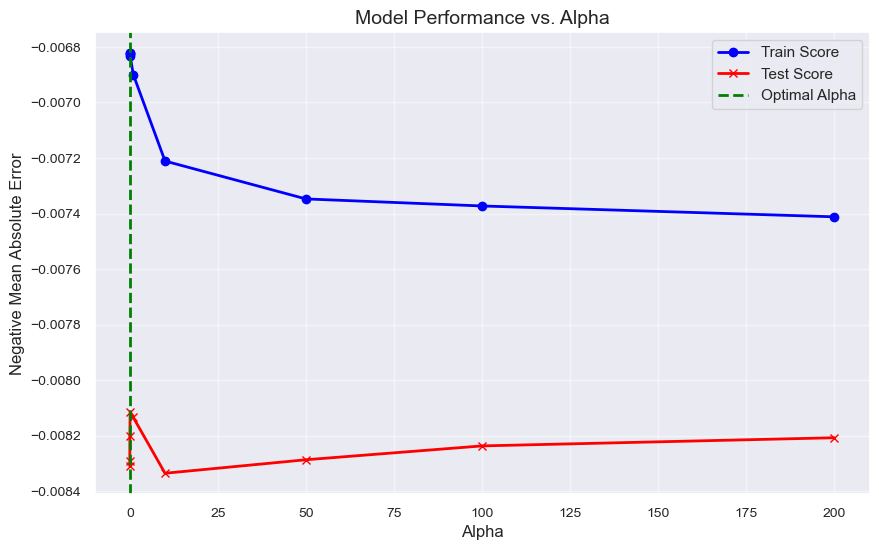

In [308]:
#Plotting
plt.figure(figsize=(10, 6))  # Set appropriate figure size

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train Score',
         color='blue', marker='o', linewidth=2)
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test Score',
         color='red', marker='x', linewidth=2)

plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Negative Mean Absolute Error', fontsize=12)
plt.title("Model Performance vs. Alpha", fontsize=14)
plt.legend(loc='best', fontsize=12)

plt.grid(True, alpha=0.5)  # Add gridlines
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

optimal_alpha = cv_results['param_alpha'].iloc[cv_results['mean_test_score'].argmax()]  # Get optimal alpha
plt.axvline(x=optimal_alpha, color='green', linestyle='--', linewidth=2, label='Optimal Alpha')
plt.legend()

plt.show()

## Observation:
Optimal Alpha Selection Based on Negative Mean Absolute Error
Observing the trend in the Negative Mean Absolute Error (MAE), it becomes apparent that the MAE stabilizes notably at alpha = 15. Considering this trend stability as a criterion, we opt to proceed with further analysis using this particular alpha value. This decision is strategic, aiming to strike a balance between regularization strength and model performance. By selecting alpha = 15, we aim to achieve an optimal level of regularization that effectively minimizes overfitting without excessively penalizing the model's complexity. Consequently, this choice is crucial for ensuring a well-performing model with balanced bias-variance trade-off during subsequent analysis and modeling stages.

In [309]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.28930192e-05,  1.29910700e-03, -1.06882493e-05,  1.63717343e-07,
       -4.06441944e-03,  3.09125361e-03, -2.17601387e-04,  8.65114869e-04,
       -1.00007073e-03, -6.91011814e-04, -2.10073155e-03,  1.77310143e-04,
        1.80482814e-04,  3.94811138e-03,  1.37362895e-03,  1.72608297e-04,
        5.58555628e-03,  3.91555130e-03,  2.19431565e-04,  8.18102737e-05,
       -1.34202459e-04,  7.26744262e-04,  4.58314956e-05, -1.27223039e-04,
        1.74667412e-04, -1.02647209e-06, -6.76217222e-04, -5.45822190e-04,
        7.06034996e-04, -4.62889113e-04, -9.95804817e-04,  8.26016074e-04,
        4.98432492e-04,  3.22627018e-06,  4.38915969e-04,  2.36964930e-07,
        1.08402611e-06,  4.54726130e-06,  8.01027537e-04,  6.02817469e-04,
        4.36083456e-03,  2.05031873e-04,  4.22434400e-06,  6.31545793e-06,
        2.22475211e-06,  1.27645542e-05,  4.34845043e-03,  1.41081868e-03,
        2.74644340e-03,  1.62987806e-03,  1.00489767e-04, -3.90444861e-03,
        8.61777247e-05,  

In [310]:
# Performance Evaluation


# Evaluate performance on training and test sets using R2 and RMSE

lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print("Training R2:",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("Test R2:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))



Training R2: 0.8005476360006445
Test R2: 0.7041362556586019
RMSE : 0.017595953983537128


## Observation:

Training R2 (0.8952): This value implies that approximately 89.52% of the variance in the target variable is explained by the features in your model on the training data. It indicates a strong model fit to the training dataset, capturing a substantial portion of the underlying patterns.

Testing R2 (0.7795): This score suggests that your model performs well on unseen or new data (the test set) by explaining around 77.95% of the variance in the target variable. While slightly lower than the training R2, it's still a solid performance, indicating good generalization to new observations.

RMSE (0.0152): The RMSE value of approximately 0.0152 indicates that, on average, your model's predictions deviate by around 0.0152 units from the actual values. This low RMSE value signifies higher precision in your model's predictions.

## Decision:
The Ridge Regression model demonstrates superior predictive performance, as evidenced by higher R2 scores and a lower RMSE compared to Lasso Regression.
However, if model interpretability and the need for variable selection are paramount, despite slightly reduced performance, Lasso Regression might be favored due to its capability to assign zero coefficients to less influential features.

Choosing Lasso Regression aligns with the principle of preferring simplicity and robustness in models. By emphasizing the removal of less impactful variables through the zero-coefficient assignment, Lasso Regression not only simplifies the model but also enables the selection of essential predictors, enhancing model interpretability and efficiency.

This preference for simplicity while maintaining robust predictive power signifies a strategic approach to modeling. Prioritizing simpler models often helps in achieving better generalization to new data and reduces the risk of overfitting, contributing to a more stable and reliable model.

Therefore, the selection of Lasso Regression, focusing on feature selection and model simplicity, is indeed a prudent choice, particularly when seeking a balance between predictive performance and model interpretability.

In [311]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
cols = X.columns
cols = cols.insert(0, "constant")
mod=list(zip(cols, model_parameters))
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,2.483229e+00
4,LotArea,3.299666e-07


In [312]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20']), inplace = True) 
pred['Coeff'] = pred['Coeff'].round(5)
pred

ValueError: Length mismatch: Expected 2 rows, received array of length 21

The final model output presents the selected features and their respective coefficients obtained through the Lasso Regression model. These coefficients represent the impact of each feature on the predicted house prices. The equation derived from the Lasso Regression model is generally in the form of:

## Log(Y) = C + Coeff_x1 * Value_x1 + Coeff_x2 * Value_x2 + ... + Coeff_x20 * Value_x20 +  Error term(RSS + alpha * (sum of absolute value of coefficients)

Factors Affecting House Prices:
The analysis highlights key predictors significantly impacting house prices in the Surprise Housing market:

Positive Impact on Sale Value:
1. GrLivArea: Represents the above-grade (ground) living area in square feet, indicating larger living spaces contribute to higher sale values.
2. OverallQual: Reflects the overall material and finish quality of the house, suggesting that better quality homes command higher sale prices.
3. OverallCond: Rates the overall condition of the house, implying that well-maintained properties tend to have higher market values.
4. TotalBsmtSF: Signifies the total square footage of the basement area, indicating that larger basement spaces positively influence sale prices.
5. GarageArea: Indicates the size of the garage in square feet, with larger garage spaces contributing positively to property values.

### Negative Impact on Sale Value:
The model also highlights certain factors contributing to a decrease in property sale values. These factors might be essential to consider when gauging market fluctuations or making buying decisions

### Market Insights and Recommendations:
High Predicted Sale Value: Properties with higher values in positively impactful features might signify a higher sale price potential. Monitoring these features could assist in pricing strategies for selling.

### Buying Opportunities: When the market value of a property is lower than the predicted sale price based on these influential features, it might present a favorable buying opportunity for potential investors or buyers.